# **Metricas de modelos PREDICTIVOS DISCRETOS**

### Nombre: PFOCCORI QUISPE ALEX HARVEY

# **1. PASOS PREVIOS**

## Librerias

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modulo de separacion de datos
from sklearn.model_selection import train_test_split
# MOdulo de Matriz de confusion
from sklearn.metrics import confusion_matrix
# Modulo de Arbol de decision
from sklearn.tree import DecisionTreeClassifier
#Modulo de reporte de metricas
from sklearn.metrics import classification_report
# Metricas
from sklearn import metrics
# Curva ROC
from sklearn.metrics import RocCurveDisplay

%matplotlib inline

## Carga de datos

In [26]:
# El objetivo del dataset, es identificacion de sexo en base a las medidas del resto
# sexo = f(peso, altura, pie, hombros, brazos, caderas, ojos)
df = pd.read_csv("diabetes.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# **2. CONVERSION DE DATOS A DATOS CATEGORICOS**

### Implementacion de un modulo que convierte un atributo categorico a numerico utilizando las funciones **astype('category')** y **cat.codes**

In [27]:
def Categorico_a_numerico(atributo):
    # Convertir el atributo al tipo categorico
    atributo = atributo.astype('category')
    # Convertir el atributo categorico a numerico
    return atributo.astype('category').cat.codes

In [28]:
# Convertir los datos categoricos a numerico
df['Gender'] = Categorico_a_numerico(df['Gender'])
df['Polyuria'] = Categorico_a_numerico(df['Polyuria'])
df['Polydipsia'] = Categorico_a_numerico(df['Polydipsia'])
df['sudden weight loss'] = Categorico_a_numerico(df['sudden weight loss'])
df['weakness'] = Categorico_a_numerico(df['weakness'])
df['Polyphagia'] = Categorico_a_numerico(df['Polyphagia'])
df['Genital thrush'] = Categorico_a_numerico(df['Genital thrush'])
df['visual blurring'] = Categorico_a_numerico(df['visual blurring'])
df['Itching'] = Categorico_a_numerico(df['Itching'])
df['Irritability'] = Categorico_a_numerico(df['Irritability'])
df['delayed healing'] = Categorico_a_numerico(df['delayed healing'])
df['partial paresis'] = Categorico_a_numerico(df['partial paresis'])
df['muscle stiffness'] = Categorico_a_numerico(df['muscle stiffness'])
df['Alopecia'] = Categorico_a_numerico(df['Alopecia'])
df['Obesity'] = Categorico_a_numerico(df['Obesity'])
df['class'] = Categorico_a_numerico(df['class'])

In [29]:
# Datos despues de la correcion
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


# **3. APLICACION DEL MODELO PREDICTIVO**

## Separacion de datos para entrenamiento y test

In [30]:
x = df.drop(['class'], axis = 1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

## Entrenamiento con arbo de decision

In [31]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=5)
modelo.fit(x_train, y_train)
modelo.score(x_test, y_test)

0.9423076923076923

# **4. PREDICCION DEL MODELO**

## Prediccion de datos de test

In [32]:
pred = modelo.predict(x_test)

## Resultados de la prediccion

In [33]:
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int8)

## Resultados de los datos reales

In [34]:
y_test

102    1
475    0
146    1
24     1
197    1
      ..
12     1
480    0
235    0
39     1
423    1
Name: class, Length: 104, dtype: int8

# **5. CALCULO Y VISUALIZACION DE METRICAS**

## Obtencion de metricas

In [35]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)
Presicion = metrics.precision_score(y_test, pred)
Sensibilidad = metrics.recall_score(y_test, pred)
PuntuacionF1 = metrics.f1_score(y_test, pred)
Reporte = classification_report(y_test, pred)

## Matriz de confusion

In [36]:
print('Matriz de confusion')
print(MatrizConfusion)

Matriz de confusion
[[40  2]
 [ 4 58]]


In [37]:
print('Exactitud     : ', Exactitud)
print('Presicion     : ', Presicion)
print('Sensibilidad  : ', Sensibilidad)
print('Puntuacion F1 : ', PuntuacionF1)

Exactitud     :  0.9423076923076923
Presicion     :  0.9666666666666667
Sensibilidad  :  0.9354838709677419
Puntuacion F1 :  0.9508196721311476


In [38]:
print('Reporte de metricas: ')
print(Reporte)

Reporte de metricas: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.95        62

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



## Curva ROC

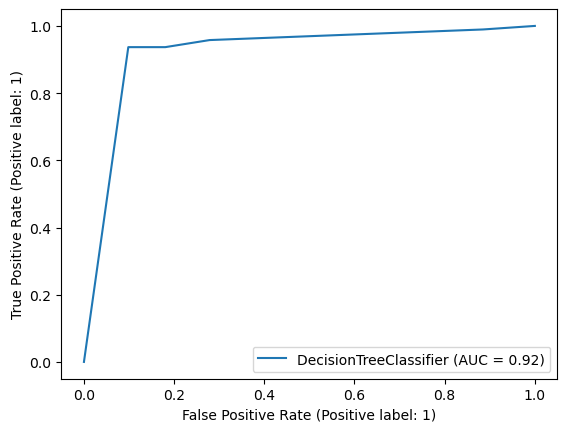

In [24]:
RocCurveDisplay.from_estimator(modelo, x_test, y_test)